y = 0.219x^2 + -12.702x + 531.988


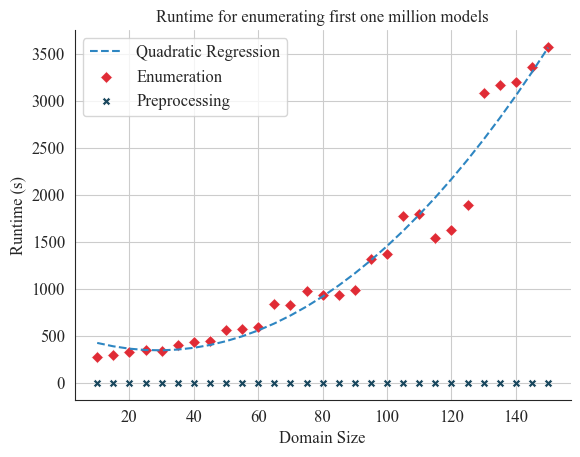

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file = "models/nonisolated_graph.wfomcs.res"
res = pd.read_csv(res_file, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
# print(res)

x = np.array(res['n'])
y = np.array(res['t_enum'])
coefficients = np.polyfit(x, y, 2)
a, b, c = coefficients
y_fit = a * x**2 + b * x + c
print(f"y = {a:.3f}x^2 + {b:.3f}x + {c:.3f}")


df = pd.DataFrame({'domain_size': x, 'runtime': y, 't_pre': np.array(res['t_pre']), 'fit': y_fit})

# plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='domain_size', y='fit', color='#2e86c2', label='Quadratic Regression', linestyle='--')
sns.scatterplot(data=df, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Enumeration')
sns.scatterplot(data=df, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Preprocessing')


sns.set_style("white")
sns.despine(left=False, bottom=False)


plt.title('Runtime for enumerating first one million models', fontproperties=font)
plt.xticks([20, 40, 60, 80, 100, 120, 140], fontproperties=font)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")


y = 0.069x^2 + 9.735x + 523.598


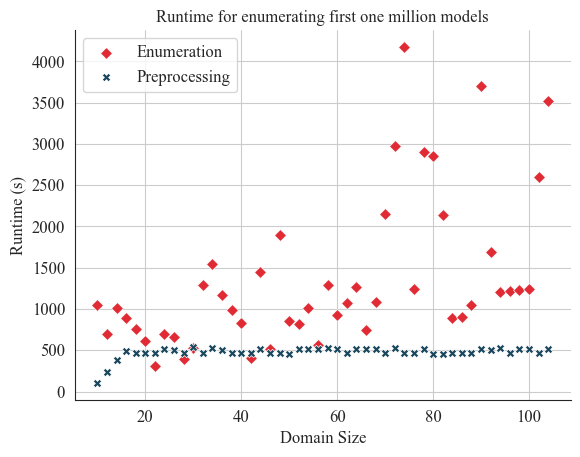

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file = "models/friends-smokes.wfomcs.res"
res = pd.read_csv(res_file, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
# print(res)

x = np.array(res['n'])
y = np.array(res['t_enum'])
coefficients = np.polyfit(x, y, 2)
a, b, c = coefficients
print(f"y = {a:.3f}x^2 + {b:.3f}x + {c:.3f}")


y_fit = a * x**2 + b * x + c
df = pd.DataFrame({'domain_size': x, 'runtime': y, 't_pre': np.array(res['t_pre']), 'fit': y_fit})

# plt.figure(figsize=(12, 6))

# sns.lineplot(data=df, x='domain_size', y='fit', color='#2e86c2', label='Quadratic Regression', linestyle='--')
sns.scatterplot(data=df, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Enumeration')
sns.scatterplot(data=df, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Preprocessing')


sns.set_style("white")
sns.despine(left=False, bottom=False)


plt.title('Runtime for enumerating first one million models', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")
